In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# other_train
df = pd.read_csv('./other_train.csv', sep=',', index_col=0) # First column is Unnamed
for column_name in df:
    if df[column_name].dtypes == 'object':
        df[column_name] = df[column_name].str.strip()

In [3]:
df.info()
# There are 22 columns. 10 atributes are float type and 12 are object.
# All columns expect name and adress have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3971 non-null   object 
 3   marital-status    3709 non-null   object 
 4   occupation        3968 non-null   object 
 5   pregnant          3967 non-null   object 
 6   education-num     3971 non-null   float64
 7   relationship      3972 non-null   object 
 8   skewness_glucose  3968 non-null   float64
 9   mean_glucose      3974 non-null   float64
 10  capital-gain      3964 non-null   float64
 11  kurtosis_glucose  3970 non-null   float64
 12  education         3969 non-null   object 
 13  fnlwgt            3965 non-null   float64
 14  class             3972 non-null   float64
 15  std_glucose       3966 non-null   float64
 16  income            3971 non-null   object 


In [5]:
df.describe() # Fundamental descriptive stats

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss
count,3971.000000,3968.000000,3974.000000,3964.000000,3970.000000,3.965000e+03,3972.000000,3966.000000,3971.000000,3971.000000
mean,10.065223,4.233223,69.173141,1228.128406,0.952248,1.911784e+05,0.256294,45.172793,40.505162,73.254092
std,2.671998,9.715162,3348.917032,8623.958204,1.614087,1.072410e+05,0.436641,7.621144,12.279149,369.551911
min,1.000000,-1.755332,-18973.437500,0.000000,-1.641515,1.882700e+04,0.000000,25.695250,1.000000,0.000000
25%,9.000000,-0.120081,83.955078,0.000000,0.070311,1.179830e+05,0.000000,40.151488,40.000000,0.000000
50%,10.000000,0.376026,110.613281,0.000000,0.311092,1.795090e+05,0.000000,45.878359,40.000000,0.000000
75%,13.000000,2.090854,125.382812,0.000000,0.776492,2.415230e+05,1.000000,50.350939,45.000000,0.000000
max,16.000000,68.101622,15887.500000,99999.000000,8.069522,1.366120e+06,1.000000,91.206475,99.000000,2824.000000


In [3]:
df.head()# medical_info complex object. Can be separated into multiple columns

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,David Hayes,235 Jennifer Throughway Suite 569\r\nNew Antho...,Black,??,Prof-specialty,f,5.0,Not-in-family,-0.197692,141.359375,...,9th,175431.0,0.0,49.842053,<=50K,"{'mean_oxygen':'4.04264214','std_oxygen':'19.4...",United-States,40.0,0.0,Private
1,Stanley Benny,"08954 Johnson Course\r\nNew Lauraville, NV 22019",White,Married-civ-spouse,Exec-managerial,f,13.0,Husband,16.019670,53.968750,...,Bachelors,66473.0,1.0,31.900220,>50K,"{'mean_oxygen':'9.294314381','std_oxygen':'35....",United-States,40.0,0.0,Private
2,Domingo Labriola,"36319 Wiley Drive Suite 094\r\nSouth Michael, ...",Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,f,3.0,Husband,21.803837,2257.812500,...,5th-6th,93206.0,1.0,35.793158,<=50K,"{'mean_oxygen':'138.7876254','std_oxygen':'79....",Philippines,40.0,0.0,Private
3,Ronnie Moore,"0755 Soto Oval Apt. 443\r\nWest Markside, TX 3...",White,Never-married,Other-service,FALSE,10.0,Not-in-family,-0.112191,110.046875,...,Some-college,137604.0,0.0,53.876575,<=50K,"{'mean_oxygen':'3.100334448','std_oxygen':'17....",United-States,40.0,0.0,Private
4,Victor Mcjunkin,"95738 Keller Overpass\r\nKennedyland, MO 71071",White,NaN,Adm-clerical,f,10.0,Not-in-family,-0.309642,137.960938,...,Some-college,174592.0,0.0,51.885451,<=50K,"{'mean_oxygen':'4.203177258','std_oxygen':'23....",United-States,40.0,0.0,Private


In [4]:
df.shape[0] - df.dropna().shape[0] # there are 337 nan values

337

In [4]:
df['address'] # We can separate address into three different columns(street, city, zip_code)

0       235 Jennifer Throughway Suite 569\r\nNew Antho...
1        08954 Johnson Course\r\nNew Lauraville, NV 22019
2       36319 Wiley Drive Suite 094\r\nSouth Michael, ...
3       0755 Soto Oval Apt. 443\r\nWest Markside, TX 3...
4          95738 Keller Overpass\r\nKennedyland, MO 71071
                              ...                        
3978    7401 Donaldson Lake Apt. 338\r\nPort Wayneview...
3979    7060 Tammy Greens Apt. 475\r\nEast Michael, KS...
3980           75021 Bishop Pass\r\nLake Rachel, ID 91709
3981    81727 Rubio Rapids Apt. 057\r\nLawsonburgh, NM...
3982          953 Caldwell Mount\r\nPort Willie, MS 14959
Name: address, Length: 3983, dtype: object

In [5]:
df['race'].unique() # Can we change Other to nan or vice-versa?

array(['Black', 'White', 'Asian-Pac-Islander', 'Other', nan,
       'Amer-Indian-Eskimo'], dtype=object)

In [9]:
df['marital-status'].value_counts() # We can change '??' values to nan

Married-civ-spouse       1680
Never-married            1180
Divorced                  439
??                        139
Widowed                   111
Separated                 109
Married-spouse-absent      49
Married-AF-spouse           2
Name: marital-status, dtype: int64

In [6]:
df['marital-status'] = df['marital-status'].replace('??', np.nan)
df['marital-status'].value_counts() # We have succesfully replaced '??' values with NaN

Married-civ-spouse       1680
Never-married            1180
Divorced                  439
Widowed                   111
Separated                 109
Married-spouse-absent      49
Married-AF-spouse           2
Name: marital-status, dtype: int64

In [11]:
df['occupation'].value_counts() # Again we can replace '?' values with NaN

Craft-repair         512
Prof-specialty       499
Exec-managerial      492
Adm-clerical         472
Other-service        424
Sales                423
Machine-op-inspct    228
?                    224
Transport-moving     192
Handlers-cleaners    177
Farming-fishing      119
Tech-support         115
Protective-serv       72
Priv-house-serv       19
Name: occupation, dtype: int64

In [7]:
df['occupation'] = df['occupation'].replace('?', np.nan)
df['occupation'].value_counts() # We have succesfully replaced '?' values with NaN

Craft-repair         512
Prof-specialty       499
Exec-managerial      492
Adm-clerical         472
Other-service        424
Sales                423
Machine-op-inspct    228
Transport-moving     192
Handlers-cleaners    177
Farming-fishing      119
Tech-support         115
Protective-serv       72
Priv-house-serv       19
Name: occupation, dtype: int64

In [13]:
# Replace 'f', 'F' and "FALSE" with one stable value "False", apply same method for "True"
df['pregnant'].value_counts() 

f        3503
F         194
FALSE     192
t          69
TRUE        5
T           4
Name: pregnant, dtype: int64

In [8]:
df['pregnant'] = df['pregnant'].replace(['f', 'F', 'FALSE'], 'False')
df['pregnant'] = df['pregnant'].replace(['t', 'T', 'TRUE'], 'True')
df['pregnant'].value_counts()

False    3889
True       78
Name: pregnant, dtype: int64

In [15]:
df['education-num'].value_counts() # This column is OK I guess

9.0     1249
10.0     870
13.0     663
14.0     220
11.0     188
7.0      138
6.0      109
12.0     103
4.0       97
15.0      82
5.0       74
16.0      54
3.0       52
8.0       44
2.0       17
1.0       11
Name: education-num, dtype: int64

In [9]:
df['relationship'].value_counts() # There are multiple same values, but they are written differently, so we can fix it
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Own-child', 'Not_in_family',
       'Unmarried', 'Own_child', 'Wife', 'Other-relative', nan,
       'Other_relative'], dtype=object)

In [10]:
df['relationship'] = df['relationship'].replace('Not_in_family', 'Not-in-family')
df['relationship'] = df['relationship'].replace('Own_child', 'Own-child')
df['relationship'] = df['relationship'].replace('Other_relative', 'Other-relative')
df['relationship'].value_counts()

Husband           1630
Not-in-family      998
Own-child          588
Unmarried          427
Wife               205
Other-relative     124
Name: relationship, dtype: int64

In [18]:
df['skewness_glucose'].value_counts() # Maybe we can round this numbers? # 24.270634 and 39.078306 ??

-0.458587     2
 0.396490     2
 0.165603     2
 3.673929     2
 36.104846    2
             ..
 0.228760     1
-0.119966     1
-1.469010     1
 24.270634    1
 39.078306    1
Name: skewness_glucose, Length: 3932, dtype: int64

In [19]:
df['mean_glucose'].value_counts() # Maybe we can round this numbers -8657.812500 ??

 123.031250     4
 124.546875     4
 108.968750     4
 128.218750     4
 122.968750     3
               ..
 88.179688      1
-8657.812500    1
 84.210938      1
 68.234375      1
 124.000000     1
Name: mean_glucose, Length: 3449, dtype: int64

In [20]:
df['education'].value_counts() # OK?

HS-grad         1246
Some-college     869
Bachelors        662
Masters          220
Assoc-voc        188
11th             137
10th             109
Assoc-acdm       103
7th-8th           99
Prof-school       82
9th               75
Doctorate         54
5th-6th           52
12th              45
1st-4th           17
Preschool         11
Name: education, dtype: int64

In [21]:
df['fnlwgt'].value_counts() # change name of the column to final_weight, how did we get value of this atribute ?

113364.0    4
144064.0    4
34180.0     4
161141.0    4
123983.0    4
           ..
179594.0    1
33619.0     1
285335.0    1
222539.0    1
28160.0     1
Name: fnlwgt, Length: 3671, dtype: int64

In [22]:
df['class'].value_counts() # This can be integer

0.0    2954
1.0    1018
Name: class, dtype: int64

In [23]:
df['std_glucose'].value_counts() # Mayber round

56.678746    2
46.336825    2
30.322605    2
42.872164    2
49.762971    2
            ..
52.244316    1
58.893506    1
52.811404    1
51.129297    1
36.876648    1
Name: std_glucose, Length: 3929, dtype: int64

In [24]:
df['income'].value_counts() # OK

<=50K    2982
>50K      989
Name: income, dtype: int64

In [25]:
df['medical_info'].value_counts() # separate this into different columns?

{'mean_oxygen':'0.668896321','std_oxygen':'9.464989304','kurtosis_oxygen':'20.02758258','skewness_oxygen':'473.449223'}            2
{'mean_oxygen':'1.984949833','std_oxygen':'14.3641057','kurtosis_oxygen':'10.94532652','skewness_oxygen':'149.84775369999997'}     2
{'mean_oxygen':'3.501672241','std_oxygen':'22.12598838','kurtosis_oxygen':'7.005293056','skewness_oxygen':'51.90616029'}           2
{'mean_oxygen':'2.673076923','std_oxygen':'15.56239929','kurtosis_oxygen':'8.785771755','skewness_oxygen':'97.52747517'}           2
{'mean_oxygen':'22.73327759','std_oxygen':'49.30776594','kurtosis_oxygen':'2.716095654','skewness_oxygen':'7.546922134'}           2
                                                                                                                                  ..
{'mean_oxygen':'135.0200669','std_oxygen':'55.57571531','kurtosis_oxygen':'0.260256506','skewness_oxygen':'-0.917726214'}          1
{'mean_oxygen':'102.0443144','std_oxygen':'73.94695882','kurtosis_oxy

In [26]:
df['native-country'].value_counts() # replace '?' with NaN

United-States         3554
Mexico                  86
?                       58
Philippines             25
Germany                 17
India                   15
Canada                  14
Guatemala               13
Japan                   11
Cuba                    11
Jamaica                 11
Puerto-Rico             11
Italy                   10
Dominican-Republic      10
Taiwan                  10
England                 10
China                   10
El-Salvador              9
South                    9
Poland                   8
Vietnam                  7
Nicaragua                6
Scotland                 5
Laos                     5
Trinadad&Tobago          5
Haiti                    5
Ecuador                  4
Peru                     4
Columbia                 4
Portugal                 3
Hong                     3
Iran                     3
Cambodia                 2
Hungary                  2
Greece                   2
France                   2
Honduras                 2
T

In [11]:
df['native-country'] = df['native-country'].replace('?', np.nan)
df['native-country'].value_counts() # # We have succesfully replaced '?' values with NaN

United-States         3554
Mexico                  86
Philippines             25
Germany                 17
India                   15
Canada                  14
Guatemala               13
Puerto-Rico             11
Japan                   11
Jamaica                 11
Cuba                    11
Italy                   10
China                   10
Dominican-Republic      10
Taiwan                  10
England                 10
El-Salvador              9
South                    9
Poland                   8
Vietnam                  7
Nicaragua                6
Laos                     5
Haiti                    5
Trinadad&Tobago          5
Scotland                 5
Columbia                 4
Ecuador                  4
Peru                     4
Hong                     3
Iran                     3
Portugal                 3
Honduras                 2
Cambodia                 2
Greece                   2
France                   2
Hungary                  2
Thailand                 1
N

In [28]:
df['hours-per-week'].value_counts() # OK

40.0    1860
50.0     359
45.0     208
60.0     173
35.0     160
        ... 
29.0       1
81.0       1
67.0       1
68.0       1
77.0       1
Name: hours-per-week, Length: 76, dtype: int64

In [29]:
df['capital-loss'].value_counts() # OK

0.0       3815
1887.0      23
1977.0      22
1902.0      15
2415.0      10
1590.0       7
1485.0       7
1876.0       5
1848.0       5
1741.0       3
2258.0       3
2042.0       3
1740.0       3
1980.0       3
1092.0       3
1672.0       3
1628.0       2
1721.0       2
1504.0       2
1579.0       2
1594.0       2
2339.0       2
323.0        2
2377.0       2
1719.0       2
2174.0       2
2444.0       2
2179.0       1
1408.0       1
1258.0       1
1380.0       1
625.0        1
2057.0       1
2051.0       1
880.0        1
2002.0       1
1573.0       1
1762.0       1
1602.0       1
1669.0       1
2603.0       1
2352.0       1
1617.0       1
2559.0       1
2824.0       1
2392.0       1
Name: capital-loss, dtype: int64

In [30]:
df['workclass'].value_counts() # Again we can replace '?' with NaN

Private             2770
Self-emp-not-inc     293
Local-gov            260
?                    227
State-gov            150
Self-emp-inc         142
Federal-gov          124
Without-pay            2
Name: workclass, dtype: int64

In [12]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['workclass'].value_counts()

Private             2770
Self-emp-not-inc     293
Local-gov            260
State-gov            150
Self-emp-inc         142
Federal-gov          124
Without-pay            2
Name: workclass, dtype: int64

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

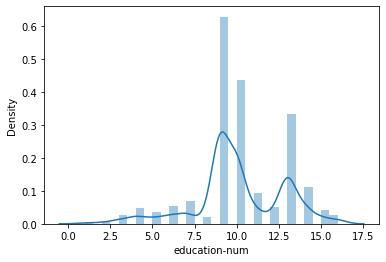

In [33]:
sns.distplot(df['education-num'], bins=30)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

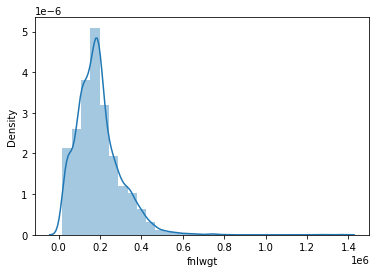

In [71]:
sns.distplot(df['fnlwgt'], bins=30)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

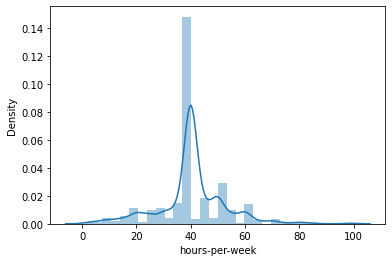

In [63]:
sns.distplot(df['hours-per-week'], bins=30)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

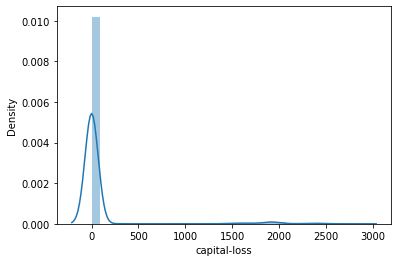

In [34]:
sns.distplot(df['capital-loss'], bins=30)

<AxesSubplot:>

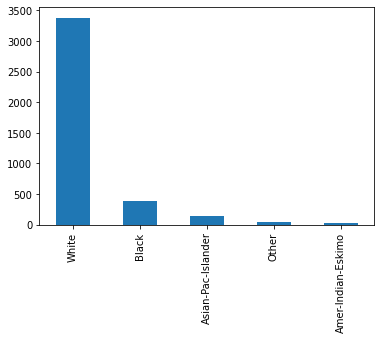

In [48]:
df['race'].value_counts().plot(kind='bar')

<AxesSubplot:>

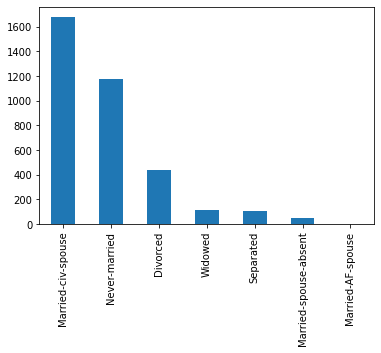

In [45]:
df['marital-status'].value_counts().plot(kind='bar')

<AxesSubplot:>

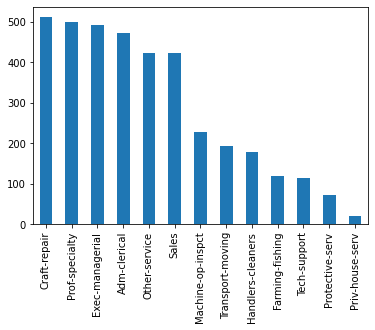

In [51]:
df['occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

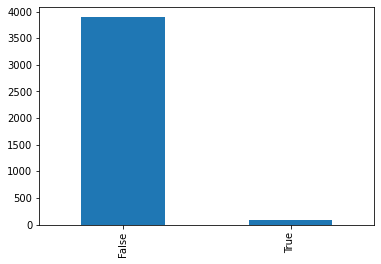

In [52]:
df['pregnant'].value_counts().plot(kind='bar')

<AxesSubplot:>

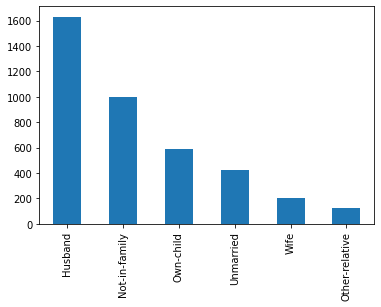

In [53]:
df['relationship'].value_counts().plot(kind='bar')

<AxesSubplot:>

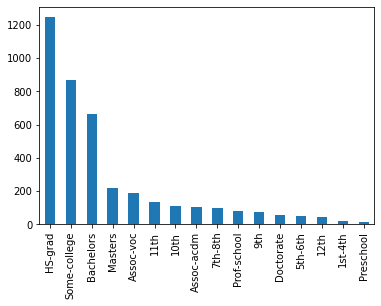

In [54]:
df['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

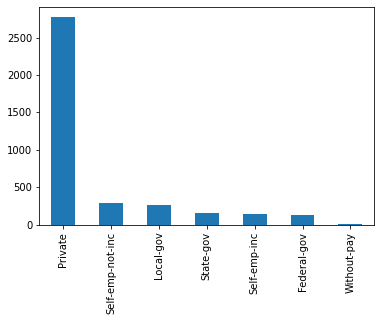

In [56]:
df['workclass'].value_counts().plot(kind='bar')

In [15]:
df.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,David Hayes,235 Jennifer Throughway Suite 569\r\nNew Antho...,Black,NaN,Prof-specialty,False,5.0,Not-in-family,-0.197692,141.359375,...,9th,175431.0,0.0,49.842053,<=50K,"{'mean_oxygen':'4.04264214','std_oxygen':'19.4...",United-States,40.0,0.0,Private
1,Stanley Benny,"08954 Johnson Course\r\nNew Lauraville, NV 22019",White,Married-civ-spouse,Exec-managerial,False,13.0,Husband,16.019670,53.968750,...,Bachelors,66473.0,1.0,31.900220,>50K,"{'mean_oxygen':'9.294314381','std_oxygen':'35....",United-States,40.0,0.0,Private
2,Domingo Labriola,"36319 Wiley Drive Suite 094\r\nSouth Michael, ...",Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,False,3.0,Husband,21.803837,2257.812500,...,5th-6th,93206.0,1.0,35.793158,<=50K,"{'mean_oxygen':'138.7876254','std_oxygen':'79....",Philippines,40.0,0.0,Private
3,Ronnie Moore,"0755 Soto Oval Apt. 443\r\nWest Markside, TX 3...",White,Never-married,Other-service,False,10.0,Not-in-family,-0.112191,110.046875,...,Some-college,137604.0,0.0,53.876575,<=50K,"{'mean_oxygen':'3.100334448','std_oxygen':'17....",United-States,40.0,0.0,Private
4,Victor Mcjunkin,"95738 Keller Overpass\r\nKennedyland, MO 71071",White,NaN,Adm-clerical,False,10.0,Not-in-family,-0.309642,137.960938,...,Some-college,174592.0,0.0,51.885451,<=50K,"{'mean_oxygen':'4.203177258','std_oxygen':'23....",United-States,40.0,0.0,Private


<AxesSubplot:xlabel='fnlwgt', ylabel='mean_glucose'>

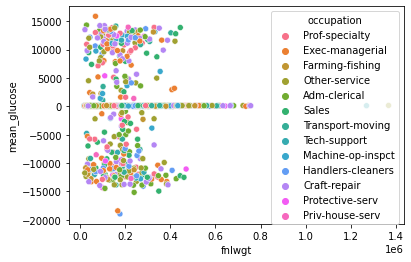

In [23]:
sns.scatterplot(x='fnlwgt', y='mean_glucose', hue='occupation', data=df) # moze byt mean pri tomto minusovy ?

<AxesSubplot:xlabel='fnlwgt', ylabel='std_glucose'>

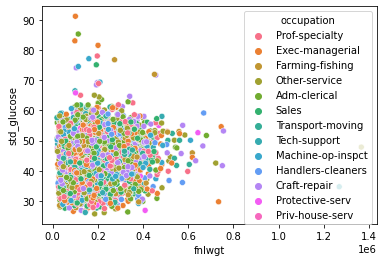

In [24]:
sns.scatterplot(x='fnlwgt', y='std_glucose', hue='occupation', data=df)

<AxesSubplot:xlabel='fnlwgt', ylabel='hours-per-week'>

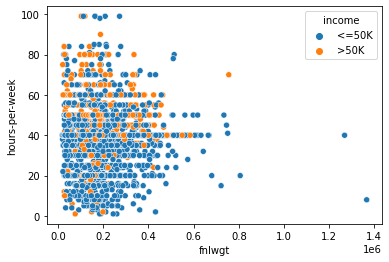

In [28]:
sns.scatterplot(x='fnlwgt', y='hours-per-week', hue='income', data=df)

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

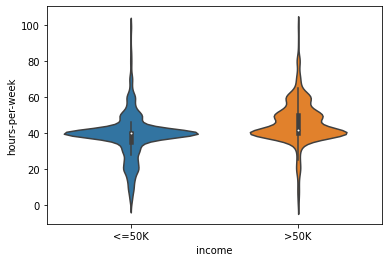

In [31]:
sns.violinplot(x='income', y='hours-per-week', data=df)

In [ ]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width')
sns.regplot(x="petal_length", y="petal_width", data=iris)

# This is used for parova analyza
plt.scatter(df.age, df.sex)
sns.pairplot(df, hue="age") # This isn't working
sns.regplot(x="petal_length", y="petal_width", data=iris)

# Corr
print("Pearson correlation: %.3f" % iris.petal_length.corr(iris.petal_width))
iris.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(iris.corr(), ax=ax, annot=True, fmt=".3f")
sns.boxplot('species', 'petal_length', data=iris)

In [76]:
df.corr()

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss
education-num,1.000000,-0.011979,0.012340,0.121256,-0.010947,-0.051732,-0.021412,-0.004888,0.143040,0.090149
skewness_glucose,-0.011979,1.000000,-0.009434,0.000182,0.961722,-0.024980,0.680597,-0.666135,-0.012818,0.002315
mean_glucose,0.012340,-0.009434,1.000000,0.024359,-0.005865,-0.022246,-0.015211,0.022384,0.024153,-0.024901
capital-gain,0.121256,0.000182,0.024359,1.000000,-0.007008,0.010546,-0.014670,0.008979,0.096427,-0.028317
kurtosis_glucose,-0.010947,0.961722,-0.005865,-0.007008,1.000000,-0.024385,0.788871,-0.653934,-0.008163,0.003581
fnlwgt,-0.051732,-0.024980,-0.022246,0.010546,-0.024385,1.000000,-0.009104,0.026743,-0.021165,-0.034717
class,-0.021412,0.680597,-0.015211,-0.014670,0.788871,-0.009104,1.000000,-0.500898,0.003044,0.003158
std_glucose,-0.004888,-0.666135,0.022384,0.008979,-0.653934,0.026743,-0.500898,1.000000,0.018442,-0.007243
hours-per-week,0.143040,-0.012818,0.024153,0.096427,-0.008163,-0.021165,0.003044,0.018442,1.000000,0.070361
capital-loss,0.090149,0.002315,-0.024901,-0.028317,0.003581,-0.034717,0.003158,-0.007243,0.070361,1.000000


<AxesSubplot:xlabel='education-num', ylabel='income'>

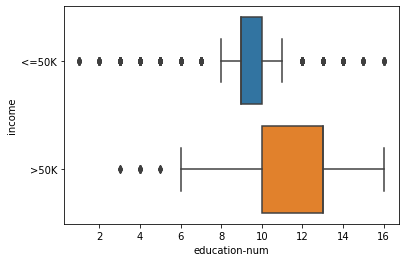

In [62]:
sns.boxplot(x='education-num', y='income', data=df)

In [5]:
# personal_train
df = pd.read_csv("./personal_train.csv", index_col=0, sep=',') # First column was Unnamend

In [18]:
df.describe() # Fundamental descriptive stats

,age
count,3540.000000
mean,51.816949
std,11.914637
min,-1.000000
25%,44.000000
50%,52.000000
75%,60.000000
max,113.000000


In [7]:
df.info() # number of records: 3933, number of atributes: 5
# name = object
# address = object
# age = float
# sex = object
# date_of_birth = object
# there are 393 cells in age column with null value
# other columns don't have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3933 non-null   object 
 1   address        3933 non-null   object 
 2   age            3540 non-null   float64
 3   sex            3933 non-null   object 
 4   date_of_birth  3933 non-null   object 
dtypes: float64(1), object(4)
memory usage: 184.4+ KB


In [8]:
df.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",63.0,Female,1956-10-02
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",58.0,Female,1961-05-14
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47.0,Male,1972-06-19
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",60.0,Female,1959-02-19
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",31.0,Female,1988-08-04


In [9]:
df_addresses = df['address'].replace('\r', ',', regex=True)
df_addresses = df_addresses.replace('\n', ' ', regex=True)
df_addresses = df_addresses.str.split(',')
df_addresses.head()

cities = []
streets = []
zip_codes = []

for address in df_addresses:
    if len(address) < 3: # these records have cities in address
        streets.append(address[0])
        cities.append(None)
        zip_codes.append(address[1])
    else: # these records don't have cities in address
        streets.append(address[0])
        cities.append(address[1])
        zip_codes.append(address[2])
   
df['street'] = streets
df['city'] = cities
df['zip_code'] = zip_codes

df = df.drop('address', axis=1)
df.head()

,name,age,sex,date_of_birth,street,city,zip_code
0,Roscoe Bohannon,63.0,Female,1956-10-02,7183 Osborne Ways Apt. 651,East Andrew,OH 53211
1,Ernest Kline,58.0,Female,1961-05-14,391 Ball Road Suite 961,Flowersborough,IN 57550
2,Harold Hendriks,47.0,Male,1972-06-19,8702 Vincent Square,New Jerryfurt,CO 30614
3,Randy Baptiste,60.0,Female,1959-02-19,2751 Harris Crossroad,West Ashley,CA 30311
4,Anthony Colucci,31.0,Female,1988-08-04,904 Robert Cliffs Suite 186,West Kyle,CO 77139


In [10]:
df.info() # 276 number of cells in city column have null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3933 non-null   object 
 1   age            3540 non-null   float64
 2   sex            3933 non-null   object 
 3   date_of_birth  3933 non-null   object 
 4   street         3933 non-null   object 
 5   city           3657 non-null   object 
 6   zip_code       3933 non-null   object 
dtypes: float64(1), object(6)
memory usage: 245.8+ KB


In [11]:
df.shape[0] - df.dropna().shape[0] # there are 643 nan values

643

In [12]:
df[df.isnull().any(axis=1)]

,name,age,sex,date_of_birth,street,city,zip_code
8,Harold Miller,NaN,Female,66-06-24,8514 Elizabeth Crescent,West Joseland,GA 49359
9,Charles Czachorowski,NaN,Male,1957-06-06,6798 Wagner Locks Suite 377,Lake Brenda,DC 53038
10,Robert Grantham,NaN,Male,1971-08-08,822 Adams Plains,New Karen,AK 92114
21,Jeffrey Taylor,42.0,Male,27/04/1977,USNV Kim,None,FPO AA 96043
24,Thaddeus Mackerl,NaN,Female,1969-06-15,8122 Jessica Knolls Apt. 880,Dakotafurt,WV 62098
...,...,...,...,...,...,...,...
3915,Drew Garst,50.0,Male,69-01-03,USNS Duarte,None,FPO AA 22046
3920,David Lackey,44.0,Male,1975-02-15,USNV Patterson,None,FPO AA 81791
3926,Joseph Leroux,59.0,Male,1960/01/04,Unit 7574 Box 5626,None,DPO AE 77296
3930,Jared Kinsey,48.0,Male,1971-05-10,Unit 8416 Box 3801,None,DPO AE 31166


<AxesSubplot:>

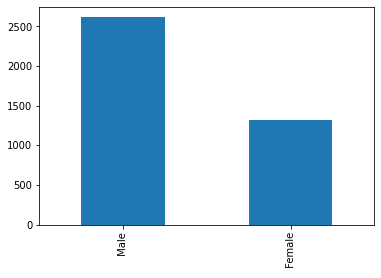

In [13]:
df.sex.value_counts().plot(kind='bar') # there are about 1600 more records about men than about women 

<AxesSubplot:>

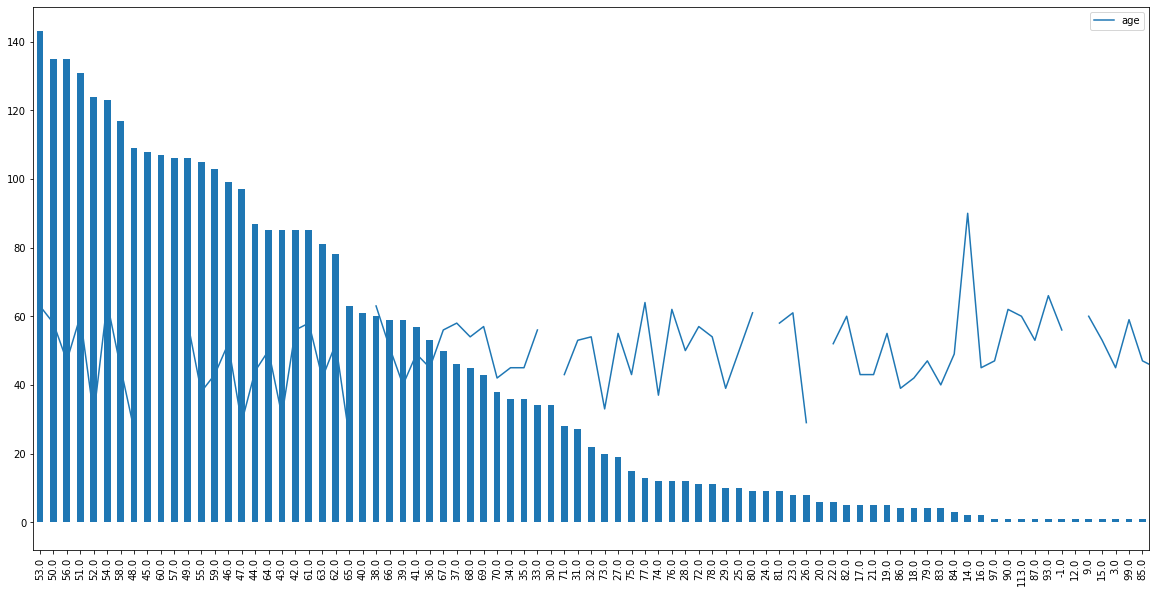

In [14]:
df.plot(figsize=(20,10))
df.age.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='age', ylabel='Count'>

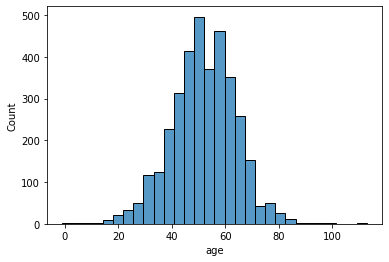

In [15]:
sns.histplot(df.age, bins=30) # Distribution of age values, Positive kurtosis and normal skewness

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

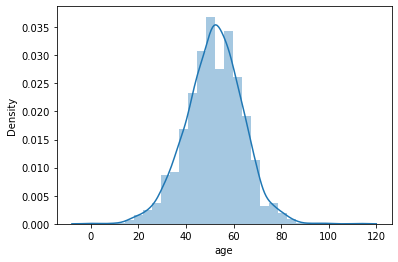

In [19]:
sns.distplot(df.age, bins=30) # Distribution of age values